In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.models import load_model


In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (256, 256, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
directory = "/content/drive/MyDrive/Capstone/data_oversampling"

filepaths = []
labels = []

folds = os.listdir(directory)

for fold in folds:
    foldpath = os.path.join(directory, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

Fseries = pd.Series(filepaths, name='Filepath')
Lseries = pd.Series(labels, name='Labels')

df = pd.concat([Fseries, Lseries], axis=1)


Found 3072 validated image filenames belonging to 4 classes.
Found 768 validated image filenames belonging to 4 classes.
Found 960 validated image filenames belonging to 4 classes.
Training for fold 1 ...
Epoch 1/20
96/96 [==============================] - 1643s 17s/step - loss: 0.8553 - accuracy: 0.6130 - val_loss: 0.6373 - val_accuracy: 0.7786
Epoch 2/20
96/96 [==============================] - 21s 214ms/step - loss: 0.5072 - accuracy: 0.7910 - val_loss: 0.5225 - val_accuracy: 0.8112
Epoch 3/20
96/96 [==============================] - 19s 195ms/step - loss: 0.4588 - accuracy: 0.8164 - val_loss: 0.6010 - val_accuracy: 0.7760
Epoch 4/20
96/96 [==============================] - 19s 195ms/step - loss: 0.4427 - accuracy: 0.8193 - val_loss: 0.4190 - val_accuracy: 0.8346
Epoch 5/20
96/96 [==============================] - 19s 200ms/step - loss: 0.3831 - accuracy: 0.8555 - val_loss: 0.5501 - val_accuracy: 0.8047
Epoch 6/20
96/96 [==============================] - 20s 204ms/step - loss: 0.366

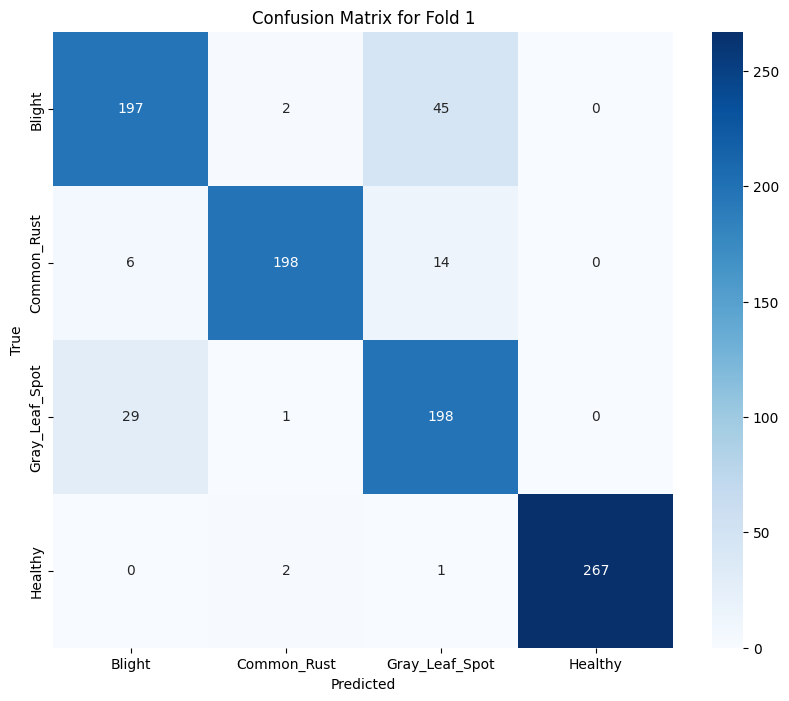

Found 3072 validated image filenames belonging to 4 classes.
Found 768 validated image filenames belonging to 4 classes.
Found 960 validated image filenames belonging to 4 classes.
Training for fold 2 ...
Epoch 1/20
96/96 [==============================] - 23s 208ms/step - loss: 0.8761 - accuracy: 0.5924 - val_loss: 0.5033 - val_accuracy: 0.8099
Epoch 2/20
96/96 [==============================] - 19s 197ms/step - loss: 0.5019 - accuracy: 0.7956 - val_loss: 0.5018 - val_accuracy: 0.7760
Epoch 3/20
96/96 [==============================] - 20s 206ms/step - loss: 0.4772 - accuracy: 0.8083 - val_loss: 0.4057 - val_accuracy: 0.8451
Epoch 4/20
96/96 [==============================] - 19s 199ms/step - loss: 0.3992 - accuracy: 0.8288 - val_loss: 0.4056 - val_accuracy: 0.8438
Epoch 5/20
96/96 [==============================] - 21s 214ms/step - loss: 0.3296 - accuracy: 0.8740 - val_loss: 0.5293 - val_accuracy: 0.8099
Epoch 6/20
96/96 [==============================] - 19s 195ms/step - loss: 0.339

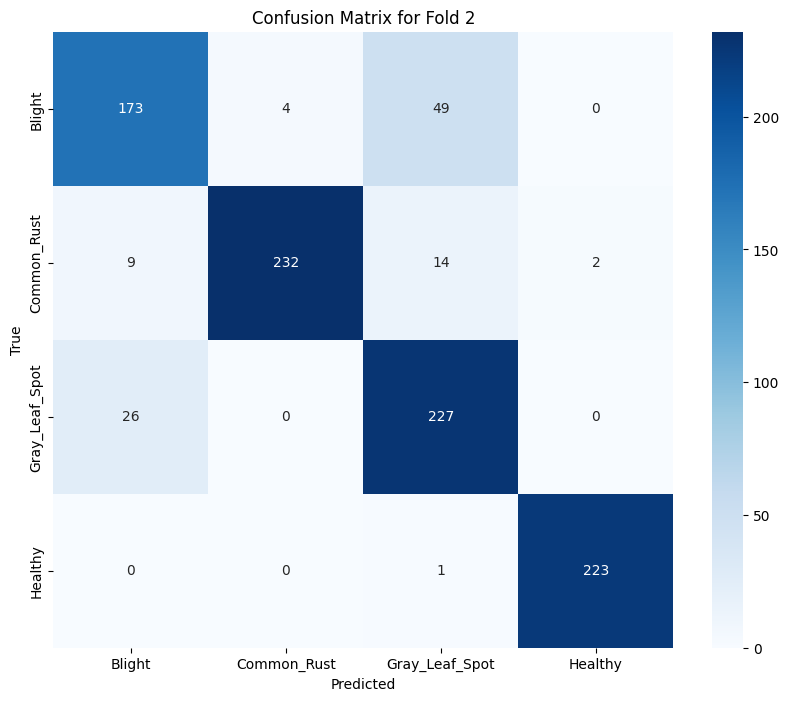

Found 3072 validated image filenames belonging to 4 classes.
Found 768 validated image filenames belonging to 4 classes.
Found 960 validated image filenames belonging to 4 classes.
Training for fold 3 ...
Epoch 1/20
96/96 [==============================] - 22s 202ms/step - loss: 0.9296 - accuracy: 0.5843 - val_loss: 0.5377 - val_accuracy: 0.7839
Epoch 2/20
96/96 [==============================] - 19s 201ms/step - loss: 0.5233 - accuracy: 0.7904 - val_loss: 0.4172 - val_accuracy: 0.8359
Epoch 3/20
96/96 [==============================] - 19s 198ms/step - loss: 0.4715 - accuracy: 0.8076 - val_loss: 0.3769 - val_accuracy: 0.8464
Epoch 4/20
96/96 [==============================] - 20s 202ms/step - loss: 0.3992 - accuracy: 0.8506 - val_loss: 0.3430 - val_accuracy: 0.8646
Epoch 5/20
96/96 [==============================] - 19s 200ms/step - loss: 0.3496 - accuracy: 0.8564 - val_loss: 0.3079 - val_accuracy: 0.8919
Epoch 6/20
96/96 [==============================] - 20s 211ms/step - loss: 0.325

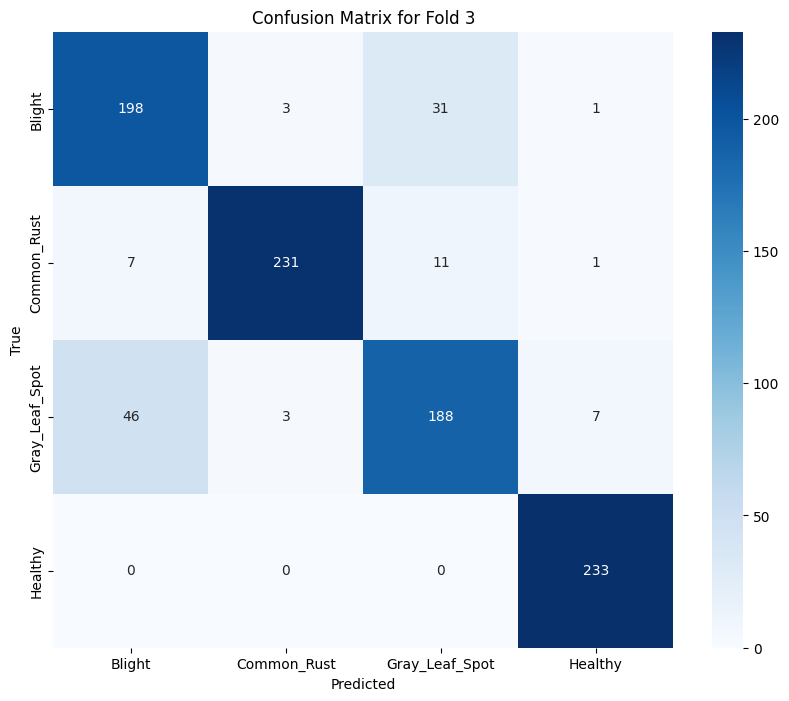

Found 3072 validated image filenames belonging to 4 classes.
Found 768 validated image filenames belonging to 4 classes.
Found 960 validated image filenames belonging to 4 classes.
Training for fold 4 ...
Epoch 1/20
96/96 [==============================] - 23s 215ms/step - loss: 1.0672 - accuracy: 0.4450 - val_loss: 0.9672 - val_accuracy: 0.4544
Epoch 2/20
96/96 [==============================] - 19s 193ms/step - loss: 0.7863 - accuracy: 0.6283 - val_loss: 0.6071 - val_accuracy: 0.7461
Epoch 3/20
96/96 [==============================] - 19s 196ms/step - loss: 0.5341 - accuracy: 0.7858 - val_loss: 0.4947 - val_accuracy: 0.7969
Epoch 4/20
96/96 [==============================] - 20s 208ms/step - loss: 0.4382 - accuracy: 0.8223 - val_loss: 0.4375 - val_accuracy: 0.8372
Epoch 5/20
96/96 [==============================] - 20s 203ms/step - loss: 0.3838 - accuracy: 0.8379 - val_loss: 0.4115 - val_accuracy: 0.8398
Epoch 6/20
96/96 [==============================] - 20s 204ms/step - loss: 0.346

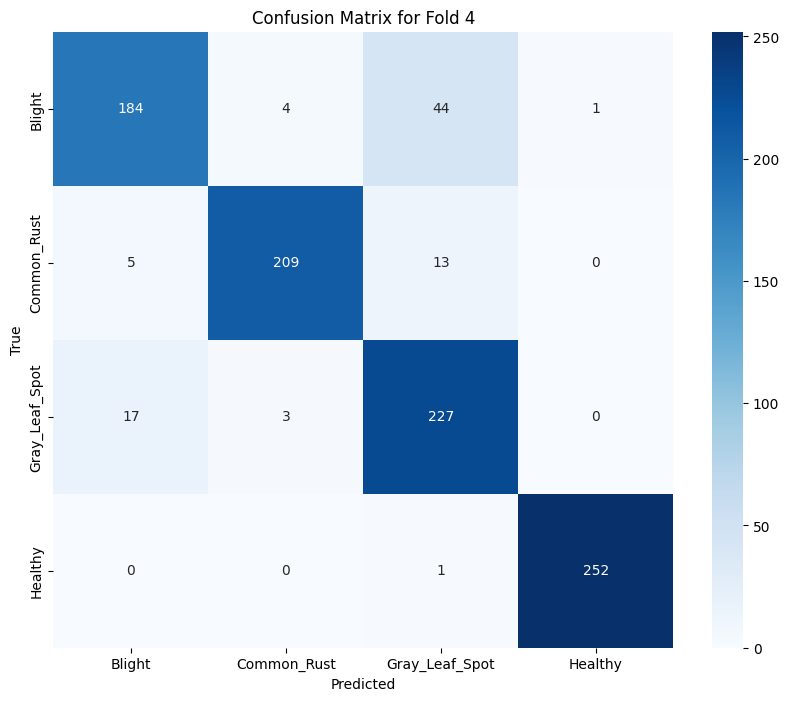

Found 3072 validated image filenames belonging to 4 classes.
Found 768 validated image filenames belonging to 4 classes.
Found 960 validated image filenames belonging to 4 classes.
Training for fold 5 ...
Epoch 1/20
96/96 [==============================] - 22s 194ms/step - loss: 1.0789 - accuracy: 0.4629 - val_loss: 0.9308 - val_accuracy: 0.5208
Epoch 2/20
96/96 [==============================] - 19s 200ms/step - loss: 0.8519 - accuracy: 0.6042 - val_loss: 0.5815 - val_accuracy: 0.7682
Epoch 3/20
96/96 [==============================] - 20s 202ms/step - loss: 0.5172 - accuracy: 0.7760 - val_loss: 0.4993 - val_accuracy: 0.7852
Epoch 4/20
96/96 [==============================] - 19s 195ms/step - loss: 0.4818 - accuracy: 0.8122 - val_loss: 0.4161 - val_accuracy: 0.8320
Epoch 5/20
96/96 [==============================] - 19s 201ms/step - loss: 0.3836 - accuracy: 0.8499 - val_loss: 0.3804 - val_accuracy: 0.8568
Epoch 6/20
96/96 [==============================] - 19s 195ms/step - loss: 0.349

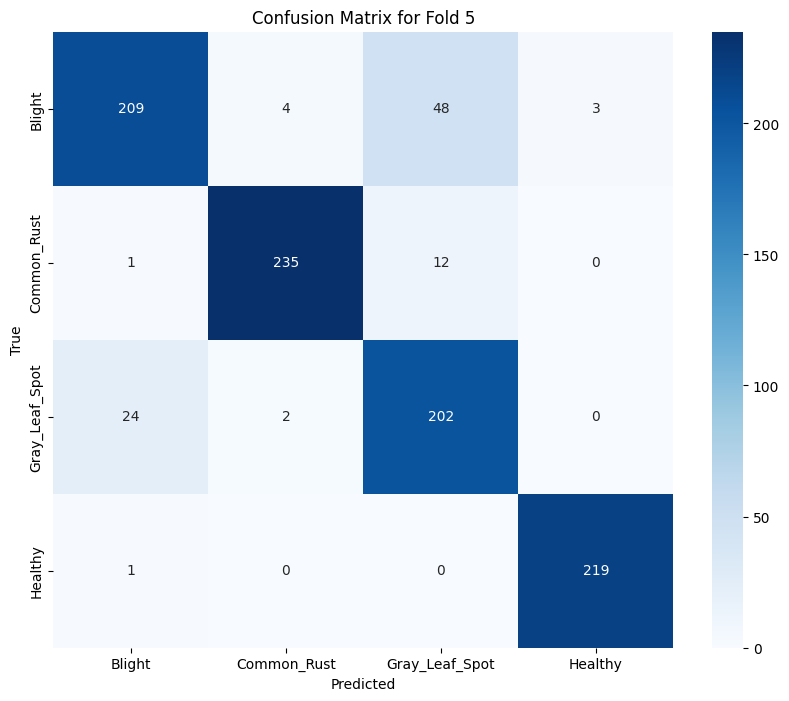

Average scores for all folds:
> Accuracy: 89.62500095367432 (+- 0.7976751341280919)
> Loss: 0.44495278000831606


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

batch_size = 32
img_size = (256, 256)
fold_no = 1
acc_per_fold = []
loss_per_fold = []
class_labels = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

for train_index, test_index in kf.split(df):
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]

    train_df, valid_df = train_test_split(train_df, test_size=0.2, shuffle=True, random_state=42, stratify=train_df['Labels'])

    gen = ImageDataGenerator(rescale=1./255)

    train_gen = gen.flow_from_dataframe(train_df, x_col='Filepath', y_col='Labels', target_size=img_size,
                                        class_mode='categorical', color_mode='rgb', shuffle=True,
                                        batch_size=batch_size)

    valid_gen = gen.flow_from_dataframe(valid_df, x_col='Filepath', y_col='Labels', target_size=img_size,
                                        class_mode='categorical', color_mode='rgb', shuffle=True,
                                        batch_size=batch_size)

    test_gen = gen.flow_from_dataframe(test_df, x_col='Filepath', y_col='Labels', target_size=img_size,
                                       class_mode='categorical', color_mode='rgb', shuffle=False,
                                       batch_size=batch_size)

    model = create_model()

    print(f'Training for fold {fold_no} ...')

    model.fit(train_gen,
              steps_per_epoch=train_gen.samples // batch_size,
              epochs=20,
              validation_data=valid_gen,
              validation_steps=valid_gen.samples // batch_size)

    scores = model.evaluate(test_gen, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    preds = model.predict(test_gen)
    y_pred = np.argmax(preds, axis=1)

    report = classification_report(test_gen.classes, y_pred, target_names=class_labels)
    print(report)

    conf_matrix = confusion_matrix(test_gen.classes, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.show()

    fold_no += 1

print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save model for each fold if needed
model.save(f'/content/drive/MyDrive/Capstone/model_fold_XX.h5')

In [3]:
from tensorflow.keras.models import load_model

# Path to the saved model H5 file
model_path = '/content/drive/MyDrive/Capstone/model_fold_6.h5'

# Load the model from the H5 file
loaded_model = load_model(model_path)


1/1 [==============================] - 0s 53ms/step


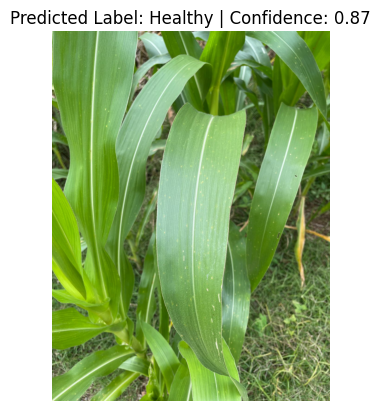

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define class labels
class_labels = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

# Function to perform image detection
def detect_image(image_path, model):
    # Read the image
    image = cv2.imread(image_path)
    # Preprocess the image
    image = cv2.resize(image, (256, 256))  # Resize to (256, 256)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    # Perform prediction
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]
    confidence = prediction[0][predicted_class]
    return predicted_label, confidence

# Path to the test image
test_image_path = '/content/drive/MyDrive/Capstone/tes/jagung5.jpeg'

# Perform detection using the loaded model
predicted_label, confidence = detect_image(test_image_path, loaded_model)

# Load and display the image
image = cv2.imread(test_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label} | Confidence: {confidence:.2f}')
plt.show()
